# Bitcoin Price Analysis- A Refactored lesson for analysis!

Through this project, we will walk you through the steps of analysing bitcoin prices and predicting the approximate exchange rates. To give you a little bit of context here, let us see what a Bitcoin is and the reason behind the fluctuation of its rates. Follow along as we scaffold all the boiler code snippets and give you the opportunity to complete the most essential parts of this analysis.

### Bitcoin : is a form of cryptocurrency and worldwide payment system. It is the first decentralized digital currency, as the system works without a central bank or single administrator. 

Bitcoins fluctuate based on sentiments, rate and quantity of transcations and the mining of bitcoins. These form the main factors in deciding the price of a bitcoin on a given day. Let us consider a dataset curated and maintained by Kaggle. This particular dataset has 23 factors which contribute towards the oscillation of Bitcoin prices over a span of 8 years(2010-02-17 to 2018-01-31 to be precise). A closer look at the features of the dataset will provide a logical solution, which is to plot a graph between the mean of the market prices of Bitcoins, of a particular year and all the years. We want you to do just that! 

### Excerise 1

* Import the dataset present at [this](https://raw.githubusercontent.com/colaberry/hackathons/master/data/Bitcoin/bitcoin_dataset.csv) and read it a Pandas Dataframe object called **df**
* Plot a graph between the years and the mean of the market value of bitcoin per year.



In [12]:
#Importing all the necessary libraries
from matplotlib.offsetbox import AnchoredText
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('ggplot')

#Write your code below this



### Hint for 1st question: Use the 
```
read_csv('pass the link into the paranthesis')
```

### Hint for the 2nd question: Follow the steps-
* Make sure that the date column is formated into datetime format by:
```
df['Date'] = pd.to_datetime(df['Date'])
```
Override the existing Date values with new Date values by :
```
df.index =df['Date'].values
```

* Make sure to calculate the mean of the column **'btc_market_price'** by grouping it alongside **'Date'**.

* Use the seaborn method to plot the graph.



In [14]:
#Solution

df = pd.read_csv("https://raw.githubusercontent.com/colaberry/hackathons/master/data/Bitcoin/bitcoin_dataset.csv")


df.fillna(method='ffill',inplace=True)


df['Date'] = pd.to_datetime(df['Date'])
df.index =df['Date'].values
time = pd.DataFrame(df[['btc_market_price','Date']].groupby('Date').mean())
sns.tsplot(df['btc_market_price'], time=time.index, condition='Time Series', color='red')



In [11]:
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if isinstance(df,pd.core.frame.DataFrame):
            if not isinstance(time.index,pd.core.indexes.datetimes.DatetimeIndex):
                raise TypeError("Change the Date column into a Datetime object")
            return True
        else:
            return False

    ref_assert_var = verify_answer()
except Exception as e: 
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

Your assertion block throws error: module 'pandas.core' has no attribute 'indexes'


# Exploratory Data Analysis - Part One

The primary motivation of EDA is to draw some basic characteristics from the bitcoin dataset by performing a statistical analysis of the given factors. EDA helps us visualise numerical data and help data scientists to draw insights from it. This is essential to get a more intimate understanding of the dataset and use the necessary tools to further your cause. EDA is the first step to understand the data and apply appropriate algorithms for finding the solutions.

Follow along as we show you a few plots between features and the reasons as to why we chose those specific elements. 

* The first plot is to analyse the number of transcations per day. This can be done simply by plotting a graph between the 'Date' and 'btc_n_transactions_total' columns.


* The second plot is to analyse the hashing rate of bitcoins per day. Hashing rate is directly referred to the processing power of Bitcoin miners and this gives us a better understanding of how the values of Bitcoins fluctuate with respect to its inflation. 


* Average transcations per block per day gives us a rough estimate of how many bitcoins are being pushed into circulation. This inturn effects the value of each bitcoin as and when the circulation rate increases. A plot of this kind is essential to understand the circulation.


* Conformation time vs Transcations per Year: For a transcation to be processed, it usually takes anywhere between an hour to fortnights. Drawing a insight on how the transcation trend changes with respect to the increase of the processing speed of transcations, is also essential to derive the value of a bitcoin. Since, consumers stop using bitcoins when the transcations take longer to process and reuse them when the transcations are quicker.

### Exercise
* Draw a plot between Date and Bit Coin Transcations in Total and give the peak transcations rate in **TR** variable
* Draw a plot between Date and Bitcoin Hash rate and draw an insight of the year having the highest hash rate in **HR** variable
* Draw a plot between Average Transcations per block and Date and give the year which saw the maximum fluctuation of transcations in **MF** variable
* Draw a plot betweeen the Conformation time and Transcations per year and give the year with the slowest transcation in **ST** variable.




In [4]:


#Write your code below this using the Dataframe objects from the precious sections and add TR,HR,MF and ST variables

### Hints: All questions are self-explanatory
Make sure to use the function 
```
plot()
```
which takes two arguments.

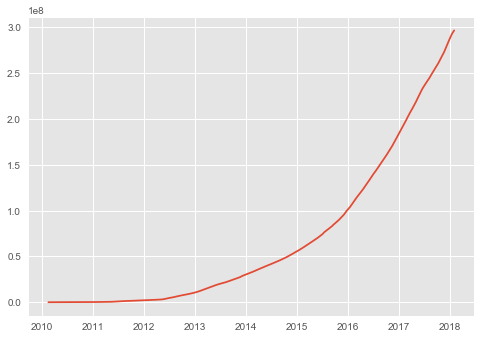

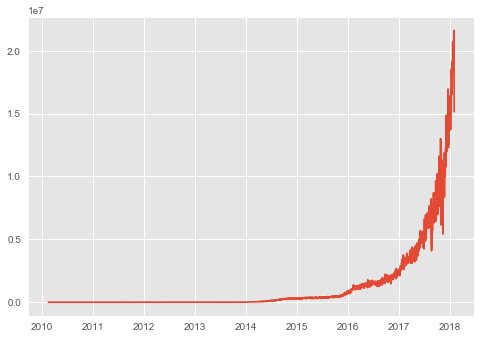

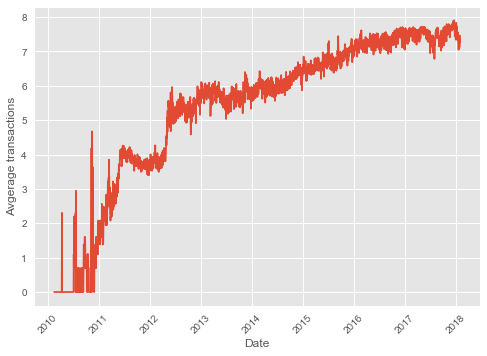

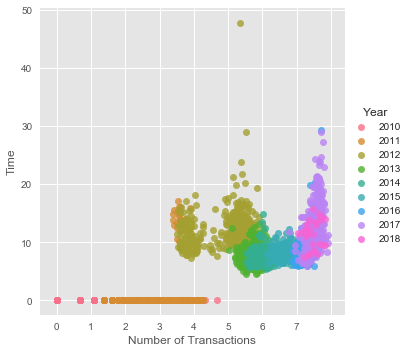

In [16]:
#Solutions


#Number of Transcations vs Date
plt.plot(df['Date'], df['btc_n_transactions_total'])
plt.show()
TR=2018 #Infer from the plot

# Bicoin Hash rate Vs Date
plt.plot(df['Date'], df['btc_hash_rate'])
plt.show()
HR=2018 #Infer from the plot




# Date Vs Average Transactions per block.
plt.plot(df['Date'], np.log(df['btc_n_transactions_per_block']))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Avgerage transactions')
plt.show()
MF=2012 #Infer from the plot


# Conformation time Vs Transactions per Year
df['Year'] = df['Date'].apply(lambda x: x.year)

sns.lmplot('btc_n_transactions_per_block','btc_median_confirmation_time',
data= pd.concat([df['btc_median_confirmation_time'],
            np.log(df['btc_n_transactions_per_block']),
            df['Year']],axis=1),hue='Year',fit_reg=False)

plt.xlabel('Number of Transactions')
plt.ylabel('Time')
plt.show()
ST=2012 #Infer from the plot

In [17]:

try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if TR==2018 and HR==2018 and MF==2012 and ST==2012:
           
            return True
        else:
            raise ValueError("Wrong answer, please try again!")    
            return False

    ref_assert_var = verify_answer()
except Exception as e: 
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue


# Exploratory Data Analysis - Part Two


In this section we will look at the importance and the usage of Heatmaps. We will also see how these Heatmaps can help us understand the dataset better. Heatmaps give us the relation between three features(generally labelled as row, column and index). Using heatmaps we can have a deeper perpective of how values correlate. In this case-scenario, we saw how the month and year effected the different attributes. 

### Exercise
* Write a generalised code snippet which produces a heatmap from any entered feature. Check this against all the features and find the feature which has the maximum color variation in the heatmap.


In [18]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df.Date=pd.to_datetime(df.Date)
df.Date=df.Date.dt.strftime('%Y-%m')
df.dropna(inplace = True)

#Write the code to find the attribute with the highest color variation and save it in HeatMap


### Hints:
Write a generalised approach by using a for loop to generate all the necessary heatmaps. Heatmaps can be generated by using a pivot table for setting two variables and then passing it into a seaborn 'heatmap' function.
```
pandasobject.pivot_table(dataframe,index=['rowvalues'],values=['subplots'],columns=['column values'])
```
Use this to generate the pivots table
```
seabornobject.heatmap()
```
The above function takes two arguments

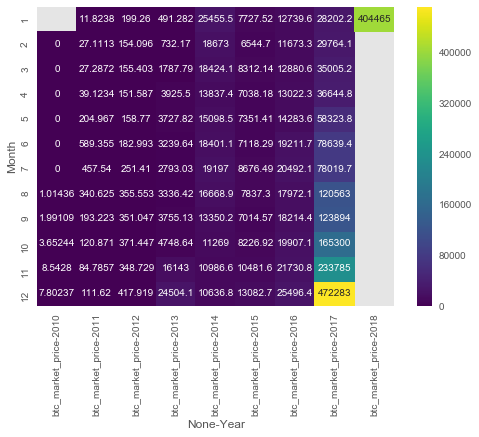

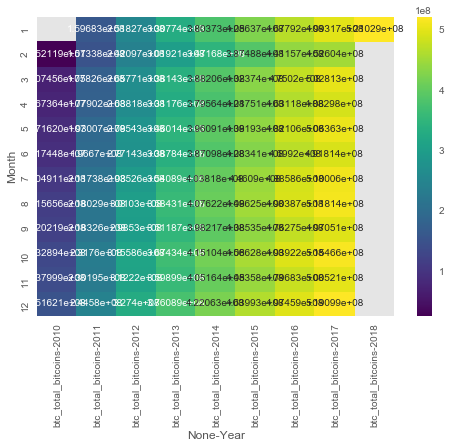

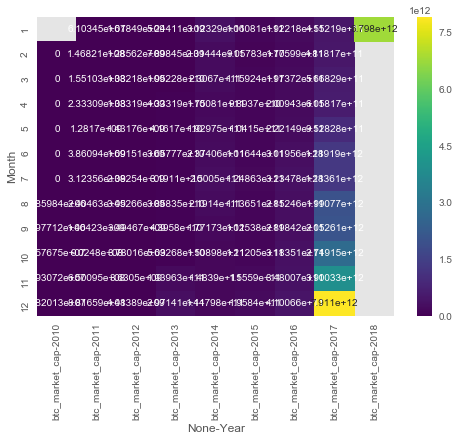

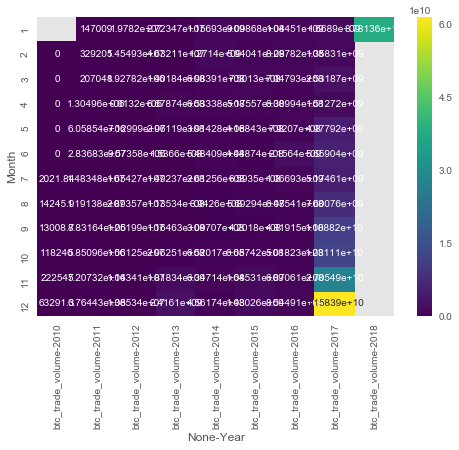

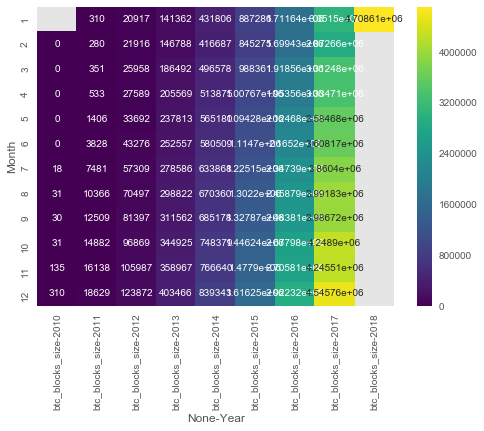

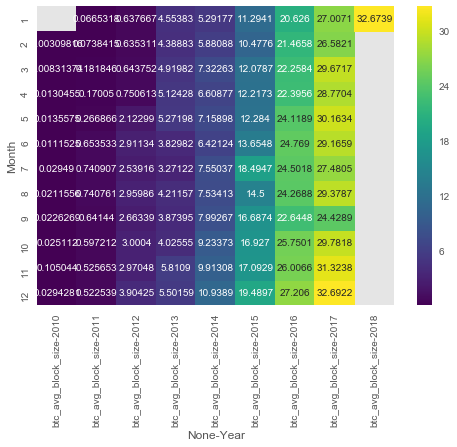

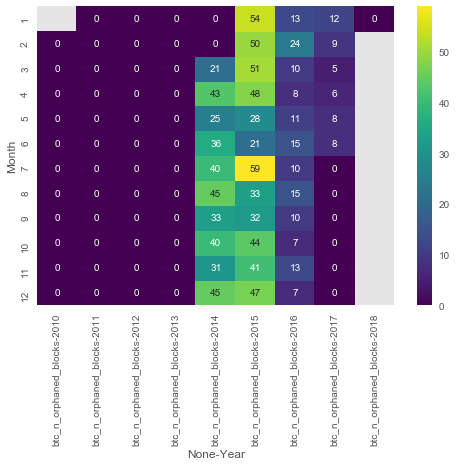

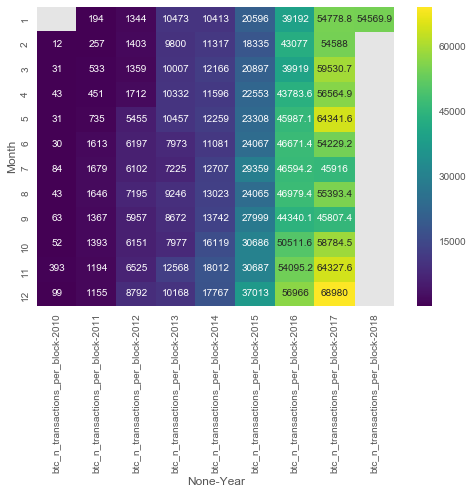

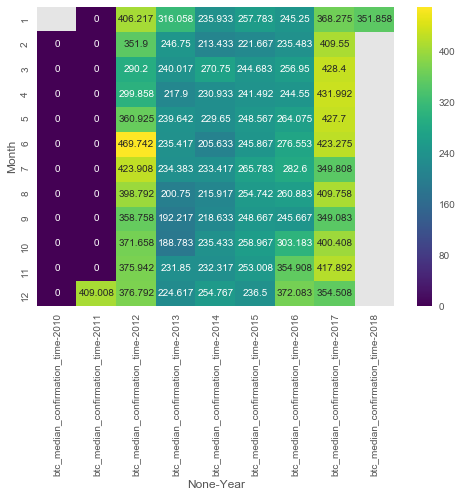

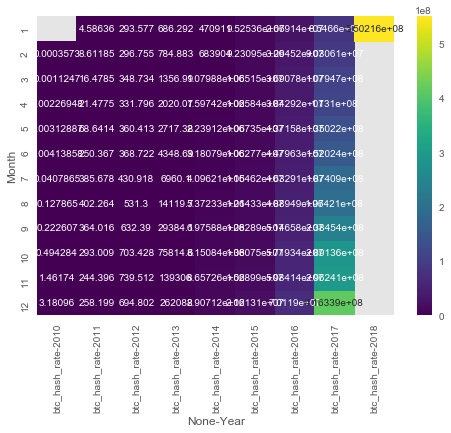

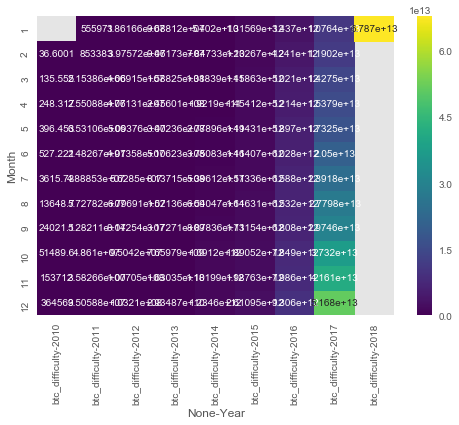

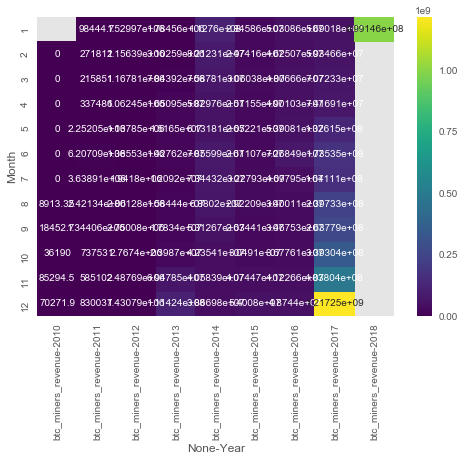

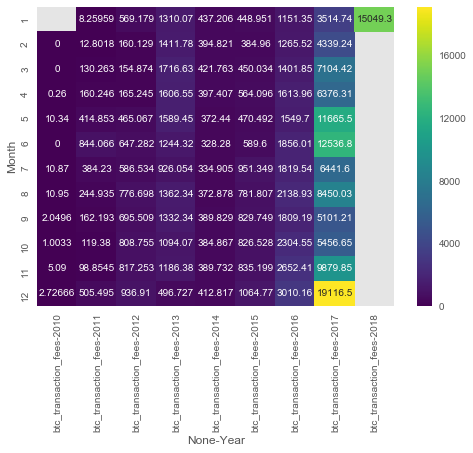

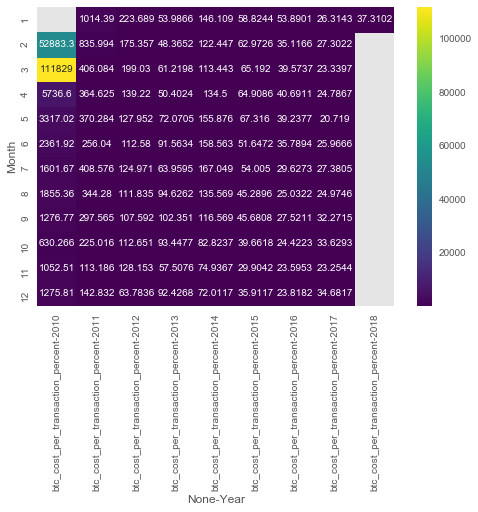

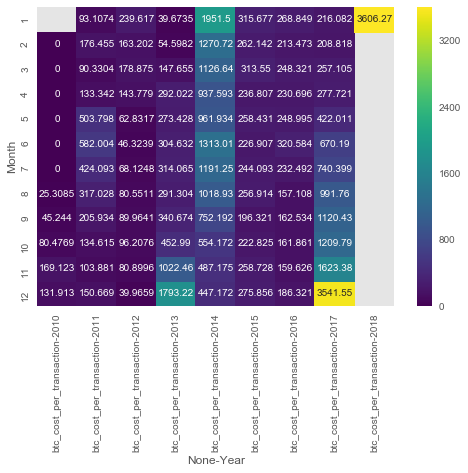

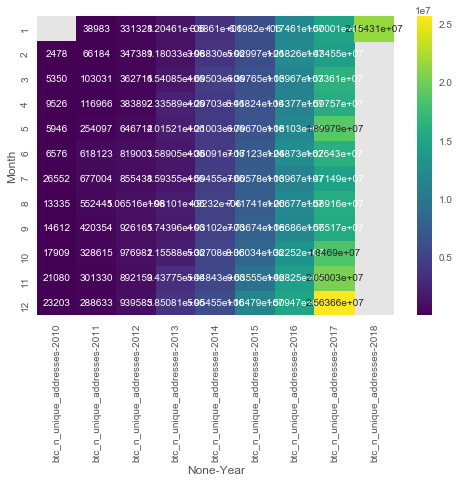

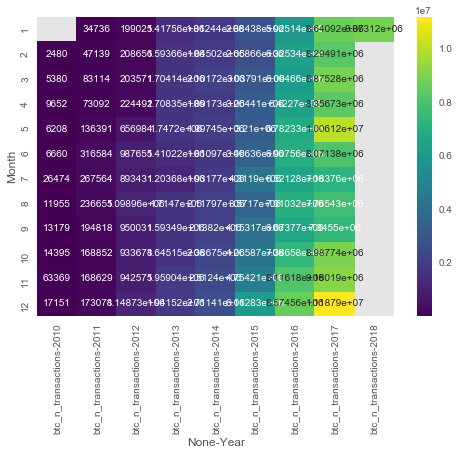

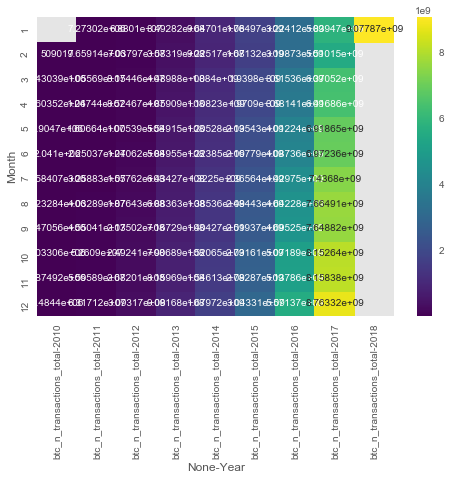

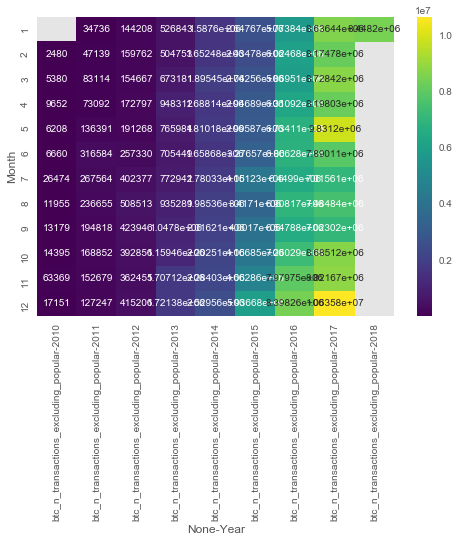

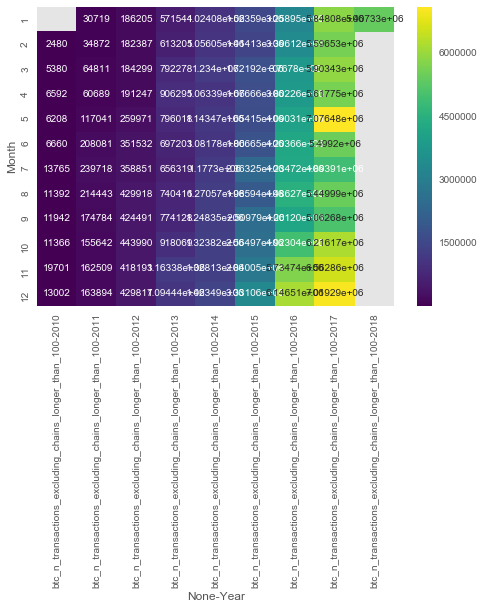

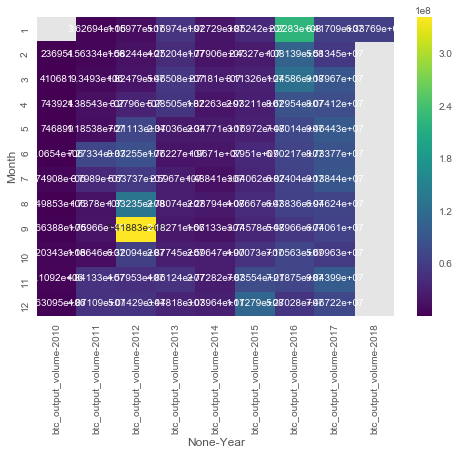

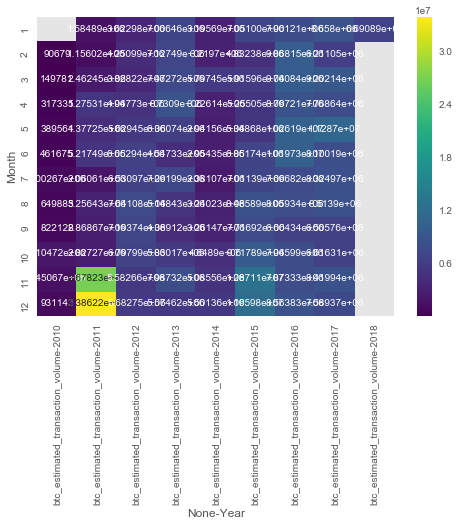

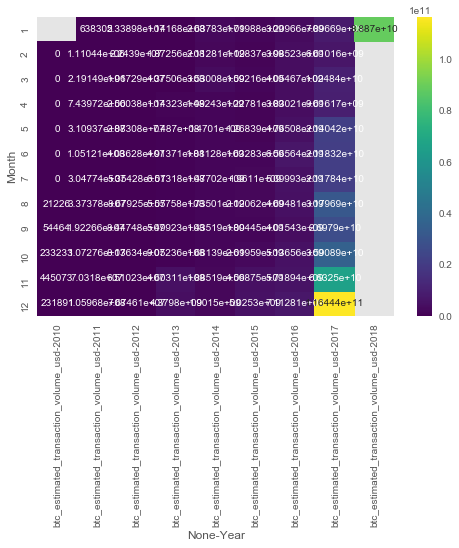

ValueError: Grouper for 'Year' not 1-dimensional

In [19]:

# Solution


k = list(df.columns)
k.remove('Date')


#To check for all the features use the following for loop

for i in k:
    to_plot = i
    df.dropna(inplace = True)
    result = pd.pivot_table(df,index=["Month"],
                   values=[to_plot],
                   aggfunc='sum',
                   columns=["Year"])
    sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
    plt.show()
#HeatMap = "btc_total_bitcoins"

In [20]:
HeatMap = "btc_total_bitcoins"
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if HeatMap=="btc_total_bitcoins":
            return True
        else:
            raise ValueError("Wrong answer, please try again!")    
            return False

    ref_assert_var = verify_answer()
except Exception as e: 
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue


# Bitcoin Price Prediction using Linear Regression

Through this segment, we will be guiding you through the steps of prediciting the rough estimated price of Bitcoin using a Machine Learning technique called Linear Regression. 

### Linear Regression: It is one of the most commonly used suprevised machine learning algorithm which takes in few continous features as input and then predicts the output based on these features. We import this linear regression model from the python library sk-learn.


### Exercise:
Let us begin by loading the dataset into the **data** variable and the **test** variable,respectively. This has already been done for you. Use your python concepts and the above concepts that we just explored to :
* Clean the data by removing/replacing all 'NaN'/missing values
* Create new Data Frames with every column except 'Date' and 'btc_market_price' and store it in a variable called **X** 
* Create a Series variable **Y** which contains the 'btc_market_price' series. We have to predict this value



In [18]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression


data = pd.read_csv('https://raw.githubusercontent.com/colaberry/hackathons/master/data/Bitcoin/bitcoin_dataset.csv')
test = pd.read_csv('https://raw.githubusercontent.com/colaberry/hackathons/master/data/Bitcoin/test_set.csv')

#Write your code below this

### Hint for Question 1:
Use 
```
isnull() 
```
on a dataframe to find the records with NaN/missing values. Use 
```
sum()
```
to find the total number of NaN values. This will give us a view of how many values could be dropped/replaced.

### Hint for Question 2:
Create a new list with all the feature names. Remove the 'Date' and the 'btc_market_price' from the given dataset and then convert the list into a Dataframe and store it into the Variable X


### Hint for Question 3:
Create a series from the dataset by storing the column name into a variable 'Y'

In [ ]:
#Solution


data.isnull().sum()
data_r = data.fillna(method='ffill') #replaced with forward filling
k = list(data_r.columns)
k.remove('Date')
k.remove('btc_market_price')
X = data_r[k] #replce with data_r or data_d
Y = data_r['btc_market_price']

In [ ]:
# Testing
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if isinstance(X,pd.core.frame.DataFrame):
            if isinstance(Y,pd.core.series.Series):
                return True
            else:
                raise TypeError("Y isnt a Series")
                return False

        else:
            raise ValueError("X isnt a Series")    
            return False

    ref_assert_var = verify_answer()
except Exception as e: 
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

## Train Test Split
Since the given analysis is a Time Series, we have to predict the market price for next two weeks, given the trends of the previous 8 years. To train our model and get an accurate answer, we use the data of the last two weeks and then predict the values. To check how our model is peforming, we use real time data of the past two weeks as test set. The 70-30 split(A general approach used for prediction) will not work here, since it is a time series analysis which requires us to specifically look into the latest continous data. 

### Exercise:
The given test-set has 14 values. Hence we have to retrieve the latest 14 values from the bitcoin data set to compare them and predict the cost of a bitcoin. To do this, you will have to:

* Create four variables with the names **train_X**,**train_Y**,**test_X and test_Y** containing the first 2892 for the train variables and the last 14 values of the data-set for the test varibles.
(Also make sure that you check the shapes and retrive values accordingly. train_X and train_Y should have same number of rows;test_X and test_Y should have same number of rows)



In [ ]:
#Write the code below

### Hint:
Use the python slicing operation

In [40]:
#Solution

train_X = X[:2892]
train_Y = Y[:2892]
test_X = X[-14:]
test_Y = Y[-14:]

In [41]:
# Testing
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if len(train_X)==len(train_Y)==2892 and len(test_X)==len(test_Y)==14:
            return True
        else:
            raise ValueError("Sizes dont match")    
            return False

    ref_assert_var = verify_answer()
except Exception as e: 
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue


Now import the Linear Regression model from sklearn into a variable called **linreg** and predict the cost.

# **Note: the model we trained is 99.9% accurate on training data.**

## Exercise:

* Apply the linear regression model for the prediction on the 'train' and 'test' datasets
* Predict the cost using the datasets
* Find the accuracy on your training set and save it in a variable called **score_X**

In [42]:
linreg = LinearRegression()
#Write solution under it and store the score in score_X


### Hint for question 1: 
```
fit()
``` 
for training the model. It takes in the two training arguments.

### Hint for question 2: 
For prediction, use
```
predict()
```
which takes in a single argument which is the test and train lists

### Hint for question 3: 

For finding the score Use:

```
model.score()
```

In [47]:
#Solution
linreg.fit(train_X,train_Y)

test_Y_pred = linreg.predict(test_X)
train_Y_pred = linreg.predict(train_X)
score_X=linreg.score(train_X,train_Y)

In [48]:
# Testing
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if score_X>=0.9:
            return True
        else:
            raise ValueError("Model is underperforming")    
            return False

    ref_assert_var = verify_answer()
except Exception as e: 
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue


## Statistical metrics of the Linear Model

Now let us check now the model is performing on the test set using the Mean Squared Error metrics. 

## **Note: The model we trained is 99.6% accurate on test_x set**


### Exercise:
Do the following on the test set X and test set.
* Find the Accuracy score on test_X and store it in score_test
* Find the mean squre error for both test and trained set
* Find the **btc_market_price** for final test set and store it in **y_pred** variable. Print the predicted values

In [53]:
#write your code and store score in score_test

### Hint for question 1:
Use
```
score()
```
to find the score. This takes two arguments. The first argument is tested against the second

### Hint for question 2:
Use 
```
np.sqrt(metrics.mean_squared_error())
```
to find the mean squared error of test and trained set.
### Hint for question 3:
Use the same set of features we used for traning

In [54]:
#solution
score_test= linreg.score(test_X,test_Y)

#metrics
print(np.sqrt(metrics.mean_squared_error(test_Y, test_Y_pred)))
print(np.sqrt(metrics.mean_squared_error(train_Y, train_Y_pred)))


#
test_d = test[k]
y_pred = linreg.predict(test_d)
print("This is your estimated bitcoin value\n:{}".format(y_pred))

41.74537756872285
15.171424621608125
This is your estimated bitcoin value
:[9076.04826146 8907.12214776 9095.27672904 8431.25580744 6793.44295667
 7617.10056413 8092.60828122 8280.07946485 8575.02350258 8323.71652254
 8384.86528014 8811.51464294 8591.74797327 9315.71047111]


In [55]:
# Testing
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if score_test>=0.8:
            return True
        else:
            raise ValueError("Model is underperforming")    
            return False

    ref_assert_var = verify_answer()
except Exception as e: 
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue
